<a href="https://colab.research.google.com/github/DerfelG/didactic-octo-memory/blob/main/Prova_Gustavo_Souza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import zipfile
from urllib.request import urlopen
import shutil
import numpy as np
import os
import seaborn as sns
import statsmodels.api as sm


In [2]:
# @title Lendo os dados

data = pd.read_csv('20240120_Casos_e_obitos_ESP.csv', sep = ";")


In [18]:
# @title Visualizando os dados
data

,Asma,Cardiopatia,Data_Inicio_Sintomas,Diabetes,Diagnostico_Covid19,Doenca_Hematologica,Doenca_Hepatica,Doenca_Neurologica,Doenca Renal,Genero,Idade,Imunodepressao,Municipio,Obesidade,Obito,Outros_Fatores_De_Risco,Pneumopatia,Puérpera,Síndrome_De_Down
0,IGNORADO,IGNORADO,15/07/2022,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,69.0,IGNORADO,ASSIS,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,IGNORADO,IGNORADO,21/02/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,60.0,IGNORADO,SÃO PAULO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,IGNORADO,IGNORADO,23/06/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,58.0,IGNORADO,ARARAQUARA,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
3,IGNORADO,IGNORADO,03/02/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,45.0,IGNORADO,SÃO PAULO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
4,IGNORADO,IGNORADO,23/02/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,FEMININO,42.0,IGNORADO,SÃO PAULO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38457,IGNORADO,IGNORADO,05/05/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,51.0,IGNORADO,MARACAÍ,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
38458,IGNORADO,IGNORADO,21/05/2021,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,44.0,IGNORADO,IBITINGA,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
38459,IGNORADO,IGNORADO,19/12/2020,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,44.0,IGNORADO,AURIFLAMA,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO
38460,IGNORADO,IGNORADO,28/08/2020,IGNORADO,CONFIRMADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,MASCULINO,55.0,IGNORADO,SUZANO,IGNORADO,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO


In [62]:
# @title Existe diferença de incidência de covid entre homens e mulheres?
#Para calcular se a diferença é significativa, o ideal é usar o teste Z. Para tanto,
#calculariamos o número de casos positivos em cada grupo (H ou M), bem como
#contaremos o número total de ocorrências (isto é, casos positivos e negativos).
# Por fim, usariamos a função proportions_ztest, da biblioteca statsmodels, para calcular a estatística.
# Essa base de dados, porém, possui apenas casos positivos, o que inviabilzia os testes.

n_mulheres = data[data.Genero == 'FEMININO'].shape[0]
n_homens = data[(data.Genero == 'MASCULINO')].shape[0]

print('Nota-se a confirmação de', n_mulheres, "casos entre as mulheres do Estado de São Paulo. \nEntre os homens, a contagem, inferior, é de", n_homens, "é casos confirmados.\nAcredito, no entanto, que esse dados não são suficientes para se afirmar que\na incidência de Covid é maior entre as mulheres.\nÉ possível, simplesmente, que as mulheres sejam mais propensas a buscar um diagnóstico.")


Nota-se a confirmação de 384580 casos entre as mulheres do Estado de São Paulo. 
Entre os homens, a contagem, inferior, é de 239043 é casos confirmados.
Acredito, no entanto, que esse dados não são suficientes para se afirmar que
a incidência de Covid é maior entre as mulheres.
É possível, simplesmente, que as mulheres sejam mais propensas a buscar um diagnóstico.


Text(0.5, 1.0, 'Taxa de mortalidade por idade (%)')

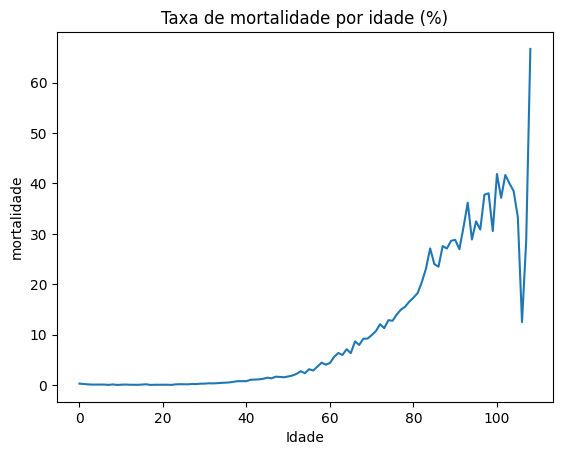

In [116]:

# @title  Faça um gráfico da mortalidade por faixas de idade
## Para calcular a de óbitos por idade, filtraremos os dados por (óbito), agruparemos por idade e contaremos as linhas.


# Total de casos por idade
total_casos = data.groupby("Idade", as_index = False)["Diagnostico_Covid19"].count()
# Total de óbitos por idade
total_obitos = data[data.Obito == 1].groupby("Idade", as_index = False)["Obito"].count()

data_total = total_casos.merge(total_obitos, on = ["Idade"])
data_total["mortalidade"] = 100*data_total["Obito"]/data_total["Diagnostico_Covid19"]
#data_total


sns.lineplot(data=data_total,
             x = 'Idade',
             y = 'mortalidade').set_title('Taxa de mortalidade por idade (%)')




Text(0.5, 1.0, 'Taxa de mortalidade por gênero e por idade(%)')

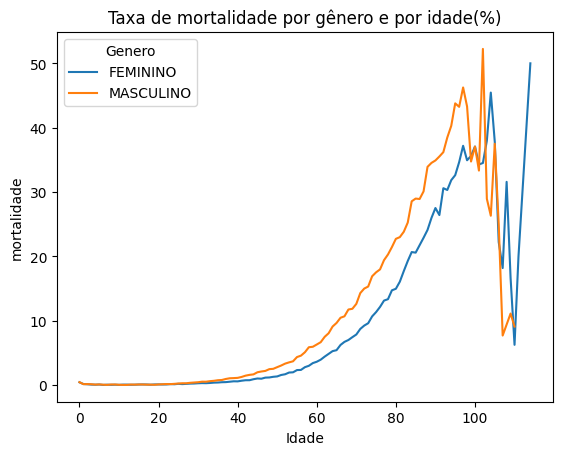

In [5]:
# @title Gráfico agrupado por gênero
total_casos_hm = data.groupby(['Idade', 'Genero'], as_index = False)["Diagnostico_Covid19"].count()
total_obitos_hm = data[data.Obito == 1].groupby(['Idade', 'Genero'], as_index = False)["Obito"].count()

data_total_hm = total_casos_hm.merge(total_obitos_hm, on = ["Idade", "Genero"])
data_total_hm["mortalidade"] = 100*data_total_hm["Obito"]/data_total_hm["Diagnostico_Covid19"]

sns.lineplot(data=data_total_hm,
             x = 'Idade',
             y = 'mortalidade',
             hue='Genero').set_title('Taxa de mortalidade por gênero e por idade(%)')

In [4]:
# @title Qual a doença pré-existente mais provável de se encontrar numa pessoa com covid?

# Primeiro, deletamos as colunas que não são de nosso interesse. Em seguida, transpomos os dados, transformando todas as colunas -- exceto a de Obito -- em linhas.
# Isso aumentará o número de linhas em 13 vezes (número de doenças).
#Porém poderemos, dessa forma, calcular a incidência de doenças na população contaminada agrupando por doenças.

data_doencas = data.drop(['Data_Inicio_Sintomas', 'Diagnostico_Covid19', "Genero", "Idade", "Municipio"], axis=1).melt(id_vars='Obito')

data_doencas["doenca"] = np.where(data_doencas["value"] == "SIM", 100, 0) # Aqui multiplico a variável binária por 100 para, ao final do exercío, termos resultados percentuais.

data_doencas.groupby(["variable"])["doenca"].agg(['mean']).sort_values(by=['mean'], ascending=False) # Uma vez que estamos interessados no número de vezes que a coluna doenças é igual a 1 divido pela contagem de cada doença, basta calcular a média agrupada por doença

## Doenças cardiacas são mais prováveis de serem encontradas, com uma incidência de 7,0% na amostra.
## Em seguida, diabetes, com uma incidência de 4,7%. Os dados completos estão disponíveis na tabale abaixo.


,mean
variable,
Cardiopatia,7.020205
Diabetes,4.670940
Outros_Fatores_De_Risco,2.279466
Obesidade,0.722353
Imunodepressao,0.587172
Doenca Renal,0.480200
Doenca_Neurologica,0.360586
Pneumopatia,0.303563
Asma,0.242419


In [7]:
# @title Doenças prévias na população com óbito

# Filtrando pelos óbitos da amostra, 42,3% possuiam alguma doença cardiaca, 30,4% algum fator de risco e 29,9% diabetes.

data_doencas[data_doencas.Obito == 1].groupby(["variable"])["doenca"].agg(['mean']).sort_values(by=['mean'], ascending=False)

,mean
variable,
Cardiopatia,42.290418
Outros_Fatores_De_Risco,30.455550
Diabetes,29.997094
Obesidade,9.542037
Doenca_Neurologica,6.215486
Doenca Renal,5.691770
Pneumopatia,5.104990
Imunodepressao,3.472424
Asma,2.169991


In [3]:
# @title Modelo

## Primeiro passo: criar o dataset de variáveis independentes.
# Para tanto, transformarei todas as variáveis de doença em variáveis categóricas.
data2 = data.drop(['Data_Inicio_Sintomas', 'Diagnostico_Covid19', "Municipio"], axis=1)
cat_vars=['Asma', "Cardiopatia", 'Diabetes', "Doenca_Hepatica", "Doenca_Neurologica", "Doenca Renal", 'Imunodepressao', "Obesidade",
          "Outros_Fatores_De_Risco", "Pneumopatia", "Puérpera", "Síndrome_De_Down",
          "Doenca_Hematologica", "Genero"]
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data2[var], prefix=var)
    data1=data2.join(cat_list)
    data2=data1
cat_vars=['Asma', "Cardiopatia", 'Diabetes',"Doenca_Hematologica", "Genero",
          "Doenca_Hepatica", "Doenca_Neurologica", "Doenca Renal", 'Imunodepressao', "Obesidade", "Outros_Fatores_De_Risco", "Pneumopatia", "Puérpera", "Síndrome_De_Down"]

data_vars=data2.columns.values.tolist()


In [4]:
# @title Visualizando os dados
# Selecionarei apenas as colunas que contém a string "SIM" no nome. Uma vez que a função get_dummies "transpõe" todos os valores das linhas em colunas binárias.
# Exemplo: a coluna diabetes -- cujo os valores são "Sim" e "Não" se transforma em "Diabetes_SIM" e "Diabetes_Não". Evidentemente essas colunas são linearmente dependentes.
# Portanto, selecionamos apenas uma delas
list_var = [x + '_SIM' for x in cat_vars]

if 'Genero_SIM' in list_var:
    list_var[list_var.index("Genero_SIM")] = "Genero_MASCULINO"

list_var.append("Idade")
list_var.append("Obito")

data2 = data2[list_var]
data2

,Asma_SIM,Cardiopatia_SIM,Diabetes_SIM,Doenca_Hematologica_SIM,Genero_MASCULINO,Doenca_Hepatica_SIM,Doenca_Neurologica_SIM,Doenca Renal_SIM,Imunodepressao_SIM,Obesidade_SIM,Outros_Fatores_De_Risco_SIM,Pneumopatia_SIM,Puérpera_SIM,Síndrome_De_Down_SIM,Idade,Obito
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,69.0,0
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,60.0,0
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,58.0,0
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,45.0,0
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,42.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770923,False,False,False,False,True,False,False,False,False,False,False,False,False,False,1.0,0
6770924,False,False,False,False,True,False,False,False,False,False,False,False,False,False,9.0,0
6770925,False,False,False,False,True,False,False,False,False,False,False,False,False,False,0.0,0
6770926,False,True,True,False,False,False,False,False,False,False,False,False,False,False,77.0,1


In [5]:
# @title Criando o modelo.
# Usaremos o modelo logit, uma vez que a nossa  variável dependente é binária

data2 = data2[data2['Idade'].notna()]


y = data2["Obito"]
x = data2.drop(["Obito"], axis=1)

logit_model=sm.Logit(y.astype(float),x.astype(float))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.173418
         Iterations 8
                                Results: Logit
Model:                   Logit               Method:              MLE         
Dependent Variable:      Obito               Pseudo R-squared:    -0.364      
Date:                    2024-06-09 23:18    AIC:                 2271627.3290
No. Observations:        6549471             BIC:                 2271832.7524
Df Model:                14                  Log-Likelihood:      -1.1358e+06 
Df Residuals:            6549456             LL-Null:             -8.3283e+05 
Converged:               1.0000              LLR p-value:         1.0000      
No. Iterations:          8.0000              Scale:               1.0000      
------------------------------------------------------------------------------
                             Coef.  Std.Err.     z      P>|z|   [0.025  0.975]
-------------------------------------------------------------

In [15]:
# @title Testando a acurácia do modelo

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(x.astype(float), y.astype(float), test_size=0.2, random_state=0)
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train, y_train)



LogisticRegression(max_iter=10000)

In [19]:
y_pred = logreg.predict(X_test)
print('Acurácia da regressão fora da amostra {:.2f}'.format(logreg.score(X_test, y_test)))

Acurácia da regressão fora da amostra 0.97


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

## A diagonal principal aponta o número de predições corretas. Já a diagonal secundária aponta o número de predições erradas fora da amostra.

[[1267300    6106]
 [  30362    6127]]


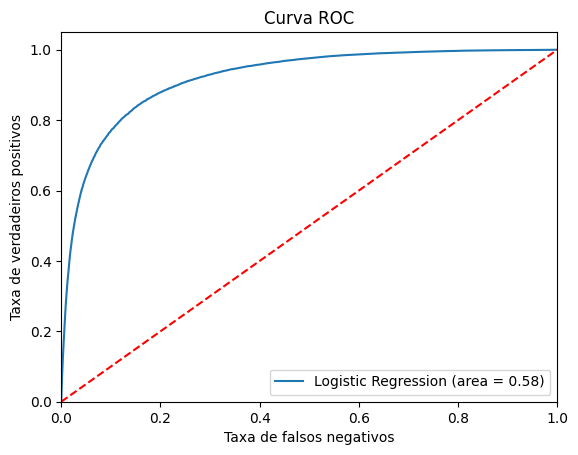

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de falsos negativos')
plt.ylabel('Taxa de verdadeiros positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

## Interpretação: quanto mais distante a curva azul estiver da curva vermelha ("uma random gess"), melhor

**Referências**

www.stackoverflow.com

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8